## Abstract
In this blog post I am hoping to find features within the given Palmer Penguins data set that will allow a machine learning model to distinguish penguins of different species. The data set, collected by Dr. Kristen Gorman and the Palmer Station in Antarctica, contains physiological measurements from a sample set of penguins that belong to three different species: Chinstrap, Gentoo, and Adelie. At the end of my exploration and model training, I decided to train my model on the following three features: the Island on which the penguin was found, the penguin's Culmen Length in millimeters, and the penguin's Culmen Depth in millimeters. Trained on these three features, my linear regression model was able to predict the species of a given penguin in the data set with 100% accuracy.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

train_url = "https://raw.githubusercontent.com/PhilChodrow/ml-notes/main/data/palmer-penguins/train.csv"
train = pd.read_csv(train_url)

In [2]:
train.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0809,31,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N63A1,Yes,11/24/08,40.9,16.6,187.0,3200.0,FEMALE,9.08458,-24.54903,NaN
1,PAL0809,41,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N74A1,Yes,11/24/08,49.0,19.5,210.0,3950.0,MALE,9.53262,-24.66867,NaN
2,PAL0708,4,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N32A2,Yes,11/27/07,50.0,15.2,218.0,5700.0,MALE,8.25540,-25.40075,NaN
3,PAL0708,15,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N38A1,Yes,12/3/07,45.8,14.6,210.0,4200.0,FEMALE,7.79958,-25.62618,NaN
4,PAL0809,34,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N65A2,Yes,11/24/08,51.0,18.8,203.0,4100.0,MALE,9.23196,-24.17282,NaN


In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train["Species"])

def prepare_data(df):
  df = df.drop(["studyName", "Sample Number", "Individual ID", "Date Egg", "Comments", "Region"], axis = 1)
  df = df[df["Sex"] != "."]
  df = df.dropna()
  y = le.transform(df["Species"])
  df = df.drop(["Species"], axis = 1)
  df = pd.get_dummies(df)
  return df, y

X_train, y_train = prepare_data(train)

In [4]:
X_train.head(20)

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),Island_Biscoe,Island_Dream,Island_Torgersen,"Stage_Adult, 1 Egg Stage",Clutch Completion_No,Clutch Completion_Yes,Sex_FEMALE,Sex_MALE
0,40.9,16.6,187.0,3200.0,9.08458,-24.54903,False,True,False,True,False,True,True,False
1,49.0,19.5,210.0,3950.0,9.53262,-24.66867,False,True,False,True,False,True,False,True
2,50.0,15.2,218.0,5700.0,8.25540,-25.40075,True,False,False,True,False,True,False,True
3,45.8,14.6,210.0,4200.0,7.79958,-25.62618,True,False,False,True,False,True,True,False
4,51.0,18.8,203.0,4100.0,9.23196,-24.17282,False,True,False,True,False,True,False,True
5,41.1,18.2,192.0,4050.0,8.62264,-26.60023,True,False,False,True,False,True,False,True
7,34.6,21.1,198.0,4400.0,8.55583,-25.22588,False,False,True,True,False,True,False,True
8,52.8,20.0,205.0,4550.0,9.25177,-24.69638,False,True,False,True,False,True,False,True
11,47.2,15.5,215.0,4975.0,8.30817,-26.21651,True,False,False,True,False,True,True,False
13,46.1,18.2,178.0,3250.0,8.85664,-24.55644,False,True,False,True,False,True,True,False


## Explore: 
Construct at least two interesting displayed figure (e.g. using seaborn) and at least one interesting displayed summary table (e.g. using pandas.groupby().aggregate). Make sure to include a helpful discussion of both the figure and the table. Don’t just show the result: explain what you learned about the data from these products.

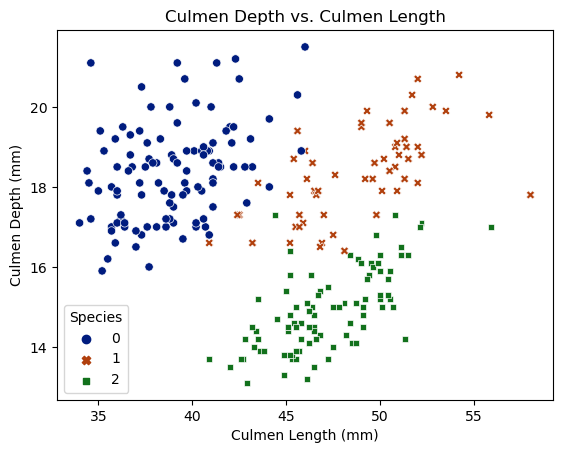

In [5]:
plot1 = sns.scatterplot(data = X_train, x = 'Culmen Length (mm)', 
    y = 'Culmen Depth (mm)', hue = y_train, 
    style = y_train, palette = "dark")
plot1.set_title("Culmen Depth vs. Culmen Length")
plot1.legend(title = "Species")

This scatterplot seems to indicate a heavy correlation between a penguin's culmen depth and length, and the penguin's species classification. One species seems to have short and moderately deep culmens (Species 0), another has moderately long and deep culmens (Species 1), and the last species has moderately long and shallow culmens (Species 2).

<Axes: title={'center': 'Flipper Length vs. Culmen Depth'}, xlabel='Culmen Depth (mm)', ylabel='Flipper Length (mm)'>

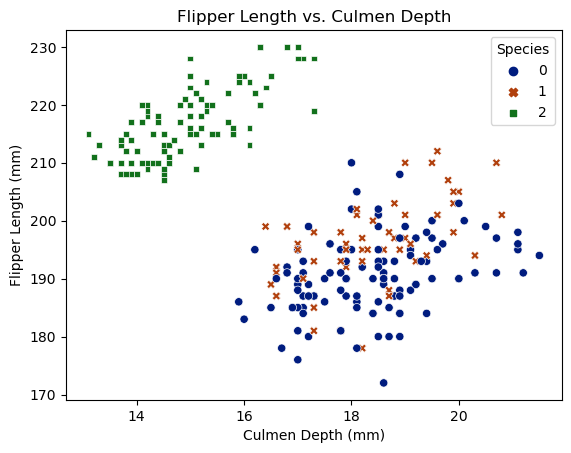

In [6]:
plot2 = sns.scatterplot(
    data = X_train, x = 'Culmen Depth (mm)', 
    y = 'Flipper Length (mm)', hue = y_train, 
    style = y_train, palette = "dark")
plot2.set_title("Flipper Length vs. Culmen Depth")
plot2.legend(title = "Species")
plot2


Pursuing the lead from the last scatter plot, I decided to plot culmen depth against flipper length, which I predicted would be species-specific, in that it is likely that different species vary noticeably in flipper length. As we saw in the last plot, Species 0 and 1 have similar culmen depths. Additionally, they also seem to have similar flipper lengths, and are therefore very closely plotted in this comparison. However, Species 2 is distinct from the other species by both flipper length and culmen depth, and are thus greatly removed from the other groups in the top left corner of this plot. This points to the fact that Species 2 generally has longer flippers and shallower culmens than the other species, so much so, that they are easily separable in this comparison.

<Axes: title={'center': 'Culmen Length Distribution Across Species'}, xlabel='Species', ylabel='Culmen Length (mm)'>

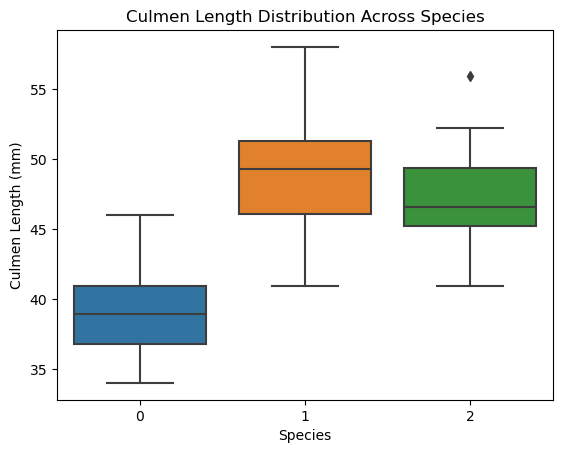

In [7]:
plot3 = sns.boxplot(
        data = X_train, x = y_train, 
        y = 'Culmen Length (mm)')
plot3.set_xlabel("Species")
plot3.set_title("Culmen Length Distribution Across Species")
plot3

Returning to the culmen length variable, we can plot its distribution across species. We can see that this variable generally distinguishes Species 0 from the other two species, in that Species 0 has a shorter culmen than both other species, which have similar culmen lengths. This points to the idea that culmen length is a good feature to use to distinguish penguins of Species 0.

In [8]:
row1 = X_train.query("Island_Biscoe == True").mean()
row2 = X_train.query("Island_Dream == True").mean()
row3 = X_train.query("Island_Torgersen == True").mean()
table1 = pd.DataFrame([row1, row2, row3])
table1

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),Island_Biscoe,Island_Dream,Island_Torgersen,"Stage_Adult, 1 Egg Stage",Clutch Completion_No,Clutch Completion_Yes,Sex_FEMALE,Sex_MALE
0,44.945600,15.863200,209.320000,4702.000000,8.394096,-26.086192,1.0,0.0,0.0,1.0,0.072000,0.928000,0.520000,0.480000
1,44.527835,18.307216,193.628866,3734.793814,9.163175,-25.075329,0.0,1.0,0.0,1.0,0.123711,0.876289,0.525773,0.474227
2,39.350000,18.441176,192.235294,3727.941176,8.844635,-25.748135,0.0,0.0,1.0,1.0,0.205882,0.794118,0.470588,0.529412


Finally, here is a summary table that groups penguins by their island, and analyzes the average quantitative features of the penguin whose data were collected on the different islands. On takeaway is that the penguins found on Island Torgersen have shorter culmens than those on the other islands. Another is that the penguins on Island Boscoe have shallower culmens than those found on the other islands. Additionally, penguins on Island Boscoe are larger (with greater flipper length and body mass). Through these comparisons, it looks like the island on which a penguin is found can be a good indicator of what species the penguin may be. This is because there seems to be a greater concentration of feature variance across islands, i.e. Boscoe has larger penguins with shallow culmens, and Torgersen has penguins with longer culmens. I predict that the best features to distinguish penguins will be Culmen Length, Culmen Depth, Island, and Flipper Length/Body Mass.

## Model:
In this section, I will find three features of the data and train a model on these features which achieves a 100% testing accuracy. 

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC # support vector classifier
from mlxtend.plotting import plot_decision_regions # for visualization later
from sklearn.model_selection import cross_val_score

Here, I am testing every possible permutation of one qualitative feature and two quantitative features, and training a model on each permutation. I will use the model that shows the best average accuracy according to cross validation.

In [10]:
from itertools import combinations

# these are not actually all the columns: you'll 
# need to add any of the other ones you want to search for
all_qual_cols = ["Clutch Completion", "Island"]
all_quant_cols = ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)']
LR = LogisticRegression(max_iter=10000)

feature_comparison = pd.DataFrame(columns=['Features', 'Accuracy'])

for qual in all_qual_cols: 
  qual_cols = [col for col in X_train.columns if qual in col ]
  for pair in combinations(all_quant_cols, 2):
    cols = qual_cols + list(pair) 
    LR.fit(X_train[cols], y_train)
    avg_score = np.mean(cross_val_score(LR, X_train[cols], y_train, cv = 5))
    
    # I'm trying to put all results into a table, and then sort by score
    feature_comparison.loc[len(feature_comparison)] = {'Features' : cols, 'Accuracy' : avg_score}

In [11]:
best_features = feature_comparison.sort_values('Accuracy', ascending = False).head(5)
best_features

,Features,Accuracy
15,"[Island_Biscoe, Island_Dream, Island_Torgersen...",0.988311
17,"[Island_Biscoe, Island_Dream, Island_Torgersen...",0.972624
19,"[Island_Biscoe, Island_Dream, Island_Torgersen...",0.964932
26,"[Island_Biscoe, Island_Dream, Island_Torgersen...",0.964857
18,"[Island_Biscoe, Island_Dream, Island_Torgersen...",0.964857


These are the features used by the most accurate model.

In [12]:
best_features['Features'].iloc[0]

['Island_Biscoe',
 'Island_Dream',
 'Island_Torgersen',
 'Culmen Length (mm)',
 'Culmen Depth (mm)']

In [13]:
fit_cols = ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Island_Biscoe', 
            'Island_Dream', 'Island_Torgersen']

This is the training accuracy of the best model.

In [14]:
LR.fit(X_train[fit_cols], y_train)
LR.score(X_train[fit_cols], y_train)

0.99609375

## Evaluate: 
In this section, I will show the decision boundaries of my model, split out by the qualitative feature.

First, here is the model's testing accuracy, it is 100% correct.

In [15]:
test_url = "https://raw.githubusercontent.com/PhilChodrow/ml-notes/main/data/palmer-penguins/test.csv"
test = pd.read_csv(test_url)

X_test, y_test = prepare_data(test)
LR.score(X_test[fit_cols], y_test)

1.0

In [16]:
from matplotlib.patches import Patch
from matplotlib import pyplot as plt

def plot_regions(model, X, y):
    
    x0 = X[X.columns[0]]
    x1 = X[X.columns[1]]
    qual_features = X.columns[2:]
    
    fig, axarr = plt.subplots(1, len(qual_features), figsize = (7, 3))

    # create a grid
    grid_x = np.linspace(x0.min(),x0.max(),501)
    grid_y = np.linspace(x1.min(),x1.max(),501)
    xx, yy = np.meshgrid(grid_x, grid_y)
    
    XX = xx.ravel()
    YY = yy.ravel()

    for i in range(len(qual_features)):
      XY = pd.DataFrame({
          X.columns[0] : XX,
          X.columns[1] : YY
      })

      for j in qual_features:
        XY[j] = 0

      XY[qual_features[i]] = 1

      p = model.predict(XY)
      p = p.reshape(xx.shape)
      
      
      # use contour plot to visualize the predictions
      axarr[i].contourf(xx, yy, p, cmap = "jet", alpha = 0.2, vmin = 0, vmax = 2)
      
      ix = X[qual_features[i]] == 1
      # plot the data
      axarr[i].scatter(x0[ix], x1[ix], c = y[ix], cmap = "jet", vmin = 0, vmax = 2)
      
      axarr[i].set(xlabel = X.columns[0], 
            ylabel  = X.columns[1], 
            title = qual_features[i])
      
      patches = []
      for color, spec in zip(["red", "green", "blue"], ["Adelie", "Chinstrap", "Gentoo"]):
        patches.append(Patch(color = color, label = spec))

      plt.legend(title = "Species", handles = patches, loc = "best")
      
      plt.tight_layout()

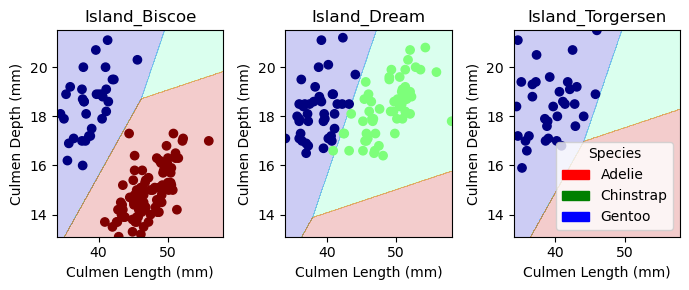

In [17]:
plot_regions(LR, X_train[fit_cols], y_train)

In [18]:
from sklearn.metrics import confusion_matrix
y_test_pred = LR.predict(X_test[fit_cols])

C = confusion_matrix(y_test, y_test_pred)
C

array([[31,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 26]], dtype=int64)

According to the confusion matrix, my model seems to have performed perfectly on the testing data, and produced no errors in the classification.

## Discussion
I performed cross validation on logistic regression models trained on every combination of 3 qualitative/quantitative features found within the Palmer's Penguins data set. The model that performed the best (to 99.6% training accuracy) was trained on the features Island, Culmen Length, and Culmen Depth, and performed with a 100% testing accuracy. I think that if I were to explore this assignment further, I would like to experiment with other classification models, to see if there are ways to classify this data set with comparable accuracy, but using fewer features.